# Projekt Wizualizacja i Przetwarzanie Danych

##### Jakub Darul, Mateusz Lamla, Michał Kierzkowski, Marcel Bieńko

## Plotnine
[Plotnine](https://plotnine.org/) to biblioteka, która przenosi ze świata języka R bibliotekę `ggplot2` do Pythona. Opiera się na tworzeniu i dodawaniu do wykresów kolejnych warstw, co sprzyja estetyce kodu.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import *
from plotnine.data import mpg, economics, diamonds
plt.style.use('default')

Przykładowe dane do wizualizacji:

In [2]:
df = pd.DataFrame({
    'rachunek': [10, 20, 15, 30, 45, 12, 25, 35, 40, 50],
    'napiwek':  [1, 3, 2, 5, 8, 1.5, 4, 6, 7, 9],
    'pora_dnia': ['Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch',
                  'Kolacja', 'Kolacja', 'Kolacja', 'Kolacja', 'Kolacja'],
    'plec': ['K', 'M', 'K', 'M', 'K', 'M', 'K', 'M', 'K', 'M']
})

1.  **Dane i Estetyka (`ggplot(data, aes(...))`)**:
    * `aes(x=..., y=..., color=...)`: Mapujemy kolumny z danych na cechy wizualne (oś X, oś Y, kolor, kształt, wielkość).

2.  **Geometrie (`geom_*`)**:
    * Określają, jak dane mają być narysowane.
    * Przykłady: `geom_point()` (punkty), `geom_line()` (linie), `geom_bar()` (słupki), `geom_boxplot()` (wykresy pudełkowe).

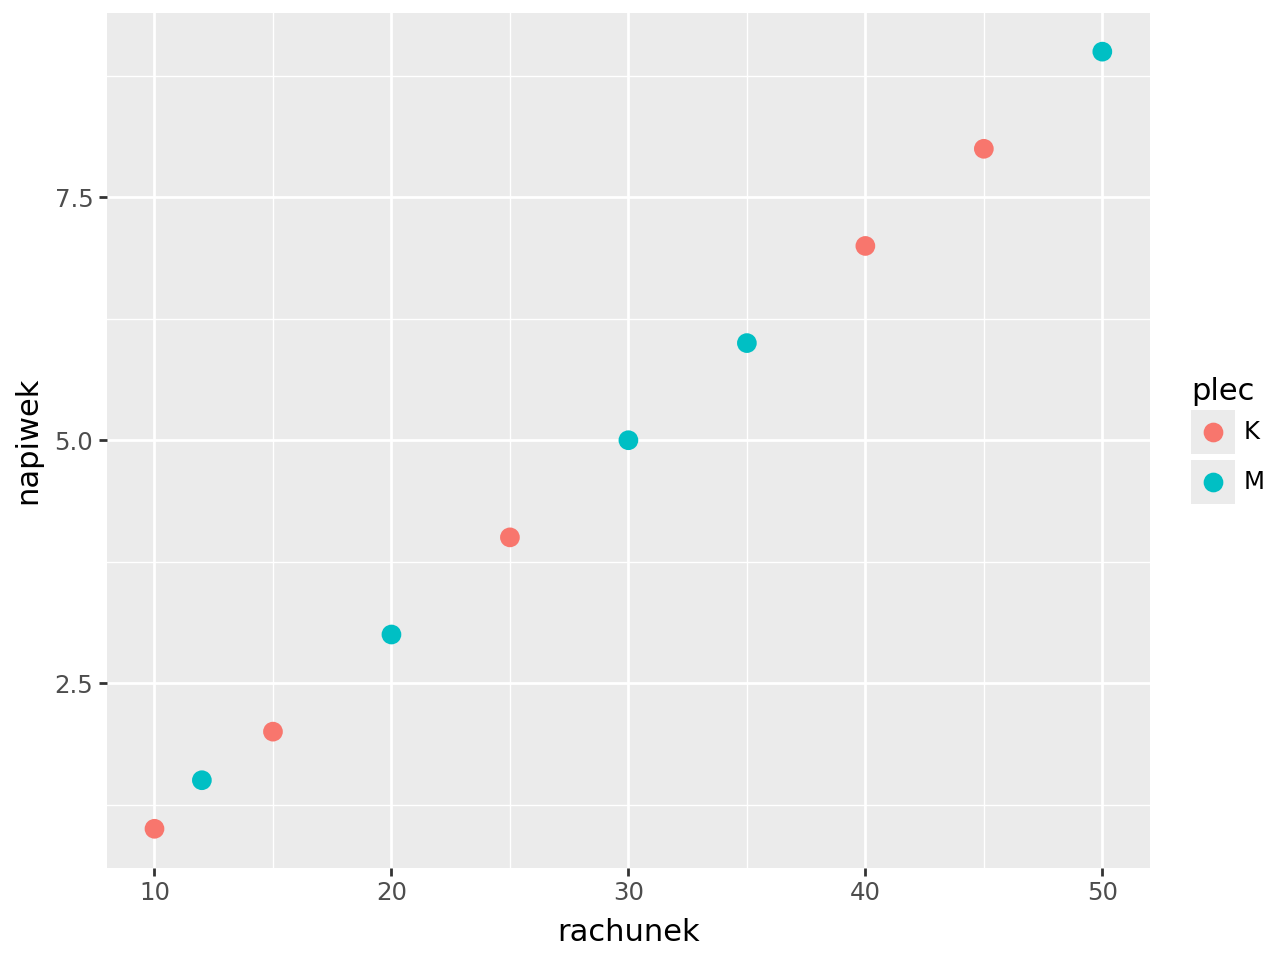

In [17]:
wykres_bazowy = (
    ggplot(df, aes(x='rachunek', y='napiwek', color='plec'))
    + geom_point(size=3)
)
wykres_bazowy

3.  **Statystyki (`stat_*`)**:
    * Pozwalają na transformację danych przed narysowaniem.
    * Przykłady: `stat_smooth()` (linia trendu), `stat_bin()` (zliczanie do histogramu).

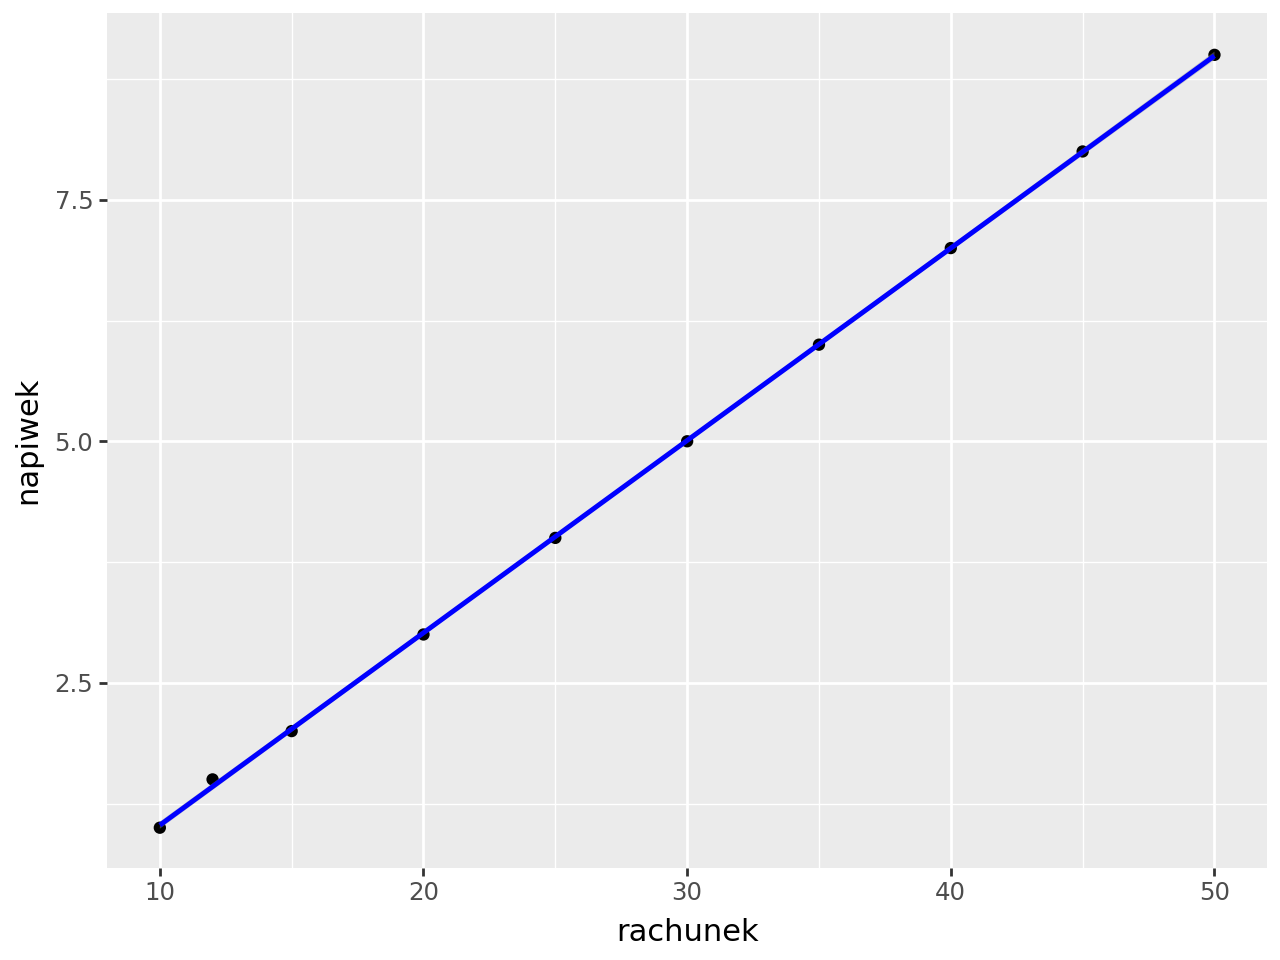

In [5]:
wykres_stat = (
    ggplot(df, aes(x='rachunek', y='napiwek'))
    + geom_point()
    + stat_smooth(method='lm', color='blue')
)
wykres_stat

4.  **Skale (`scale_*`)**:
    * Kontrolują sposób mapowania danych.
    * Przykłady: `scale_color_manual()` (własne kolory), `scale_x_log10()` (skala logarytmiczna).

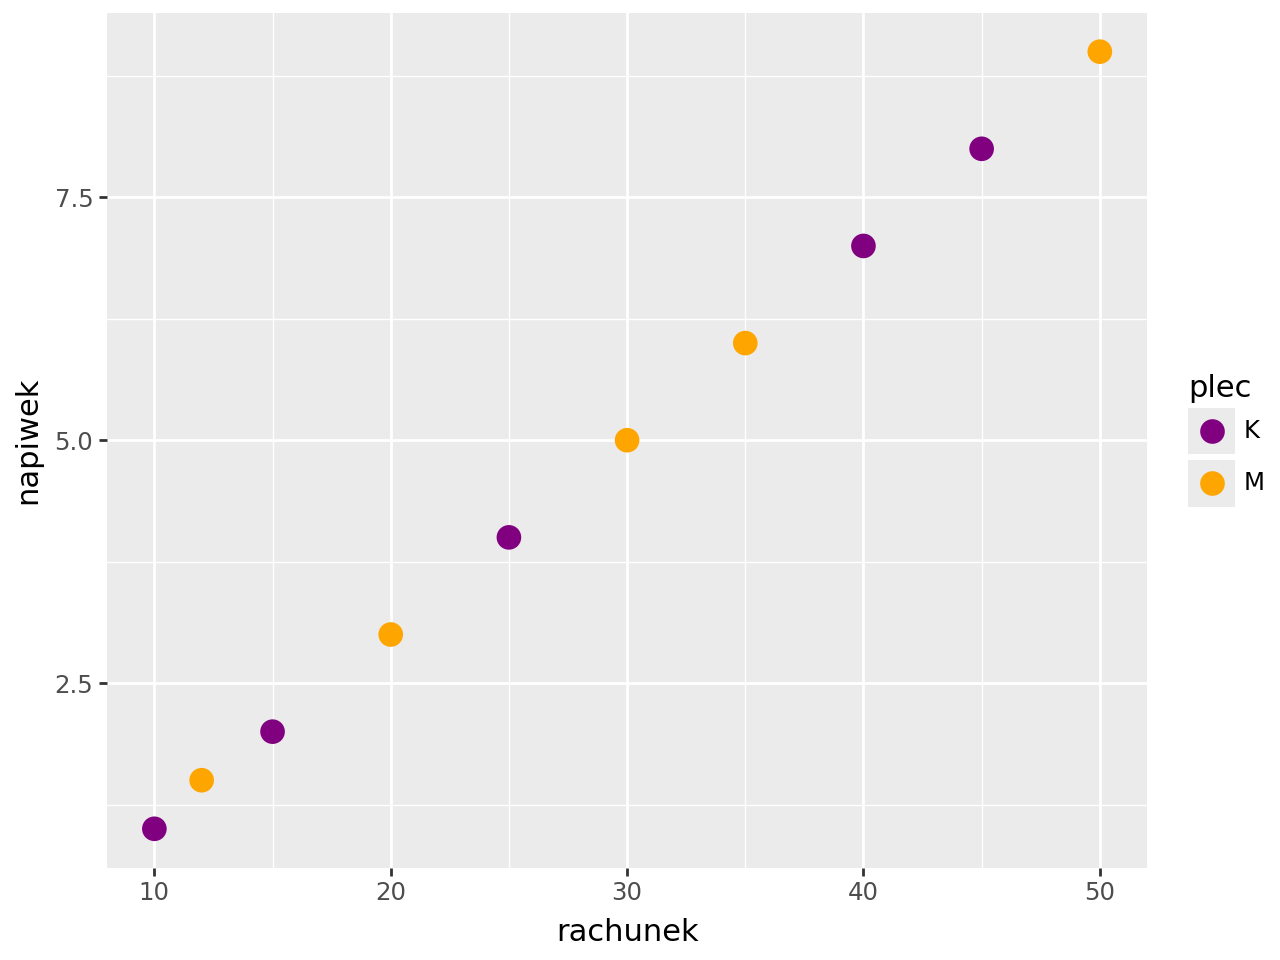

In [7]:
wykres_skale = (
    ggplot(df, aes(x='rachunek', y='napiwek', color='plec'))
    + geom_point(size=4)
    + scale_color_manual(values={'K': 'purple', 'M': 'orange'})
)
wykres_skale

5.  **Układy współrzędnych (`coord_*`)**:
    * Przykłady: `coord_flip()` (zamiana osi X i Y), `coord_polar()` (układ biegunowy - np. do wykresów kołowych).

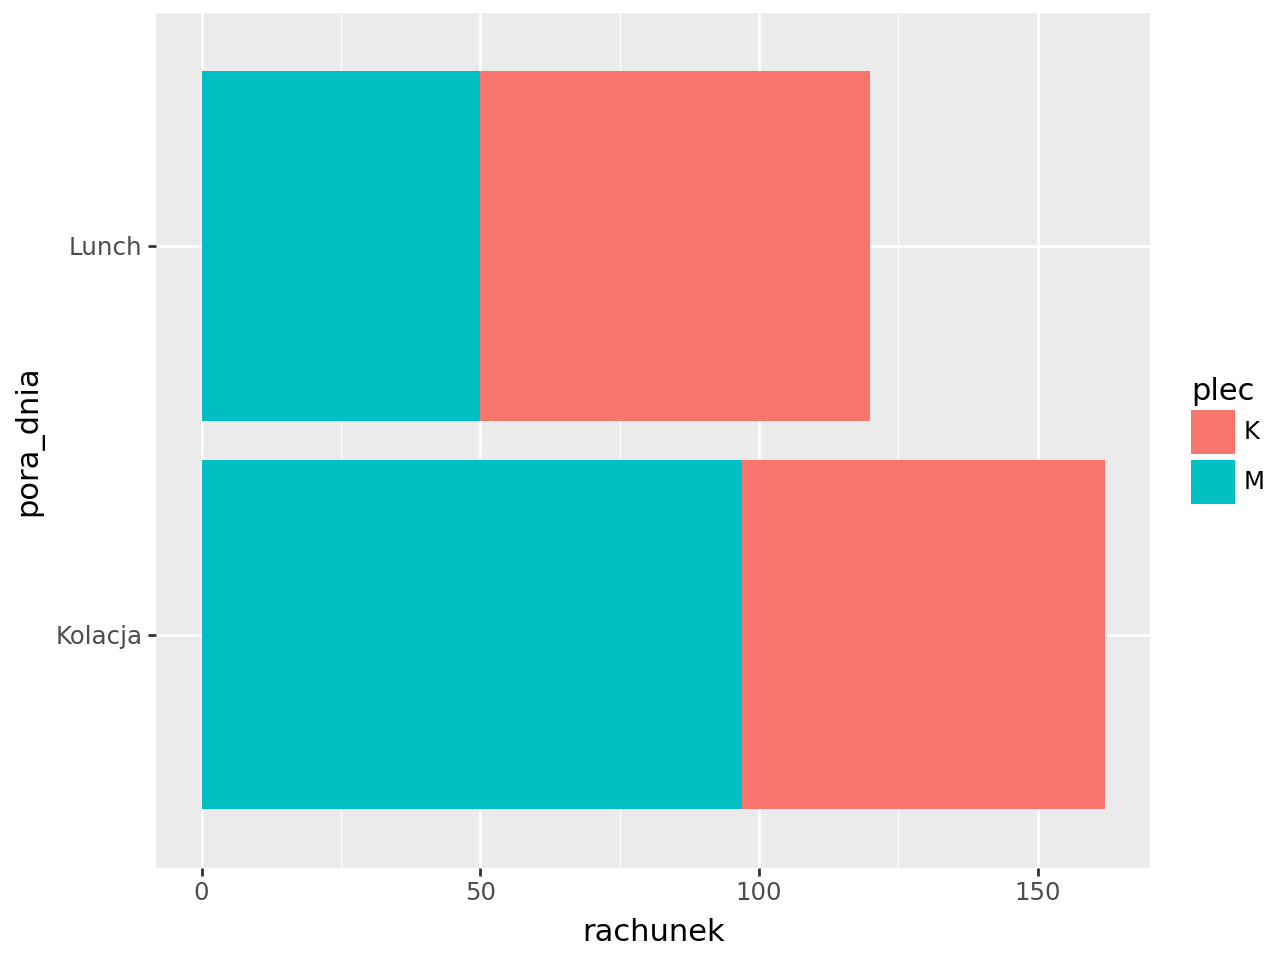

In [10]:
wykres_coord = (
    ggplot(df, aes(x='pora_dnia', y='rachunek', fill='plec'))
    + geom_col()
    + coord_flip()
)
wykres_coord

6.  **Panele (`facet_*`)**:
    * Dzielą wykres na mniejsze podwykresy (subploty) na podstawie zmiennej kategorialnej.
    * Przykłady: `facet_wrap()`, `facet_grid()`.

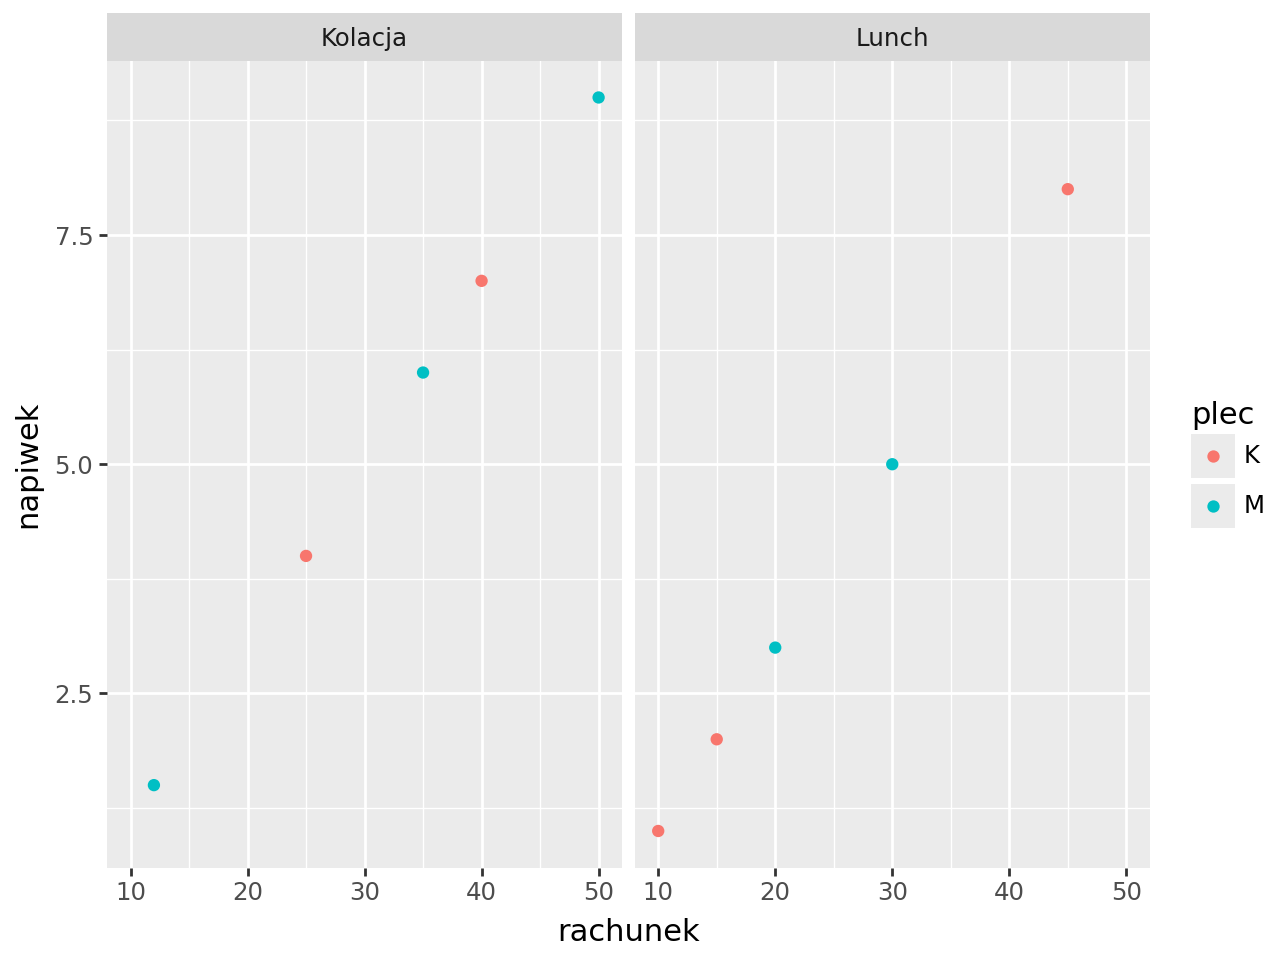

In [12]:
wykres_facet = (
    ggplot(df, aes(x='rachunek', y='napiwek', color='plec'))
    + geom_point()
    + facet_wrap('~pora_dnia')
)
wykres_facet

7.  **Motywy (`theme_*` i `theme()`)**:
    * Odpowiadają za wygląd "nie-danych" (tło, czcionki, legenda).
    * Przykłady: `theme_minimal()`, `theme_gray()`, `labs()` (tytuły i etykiety).

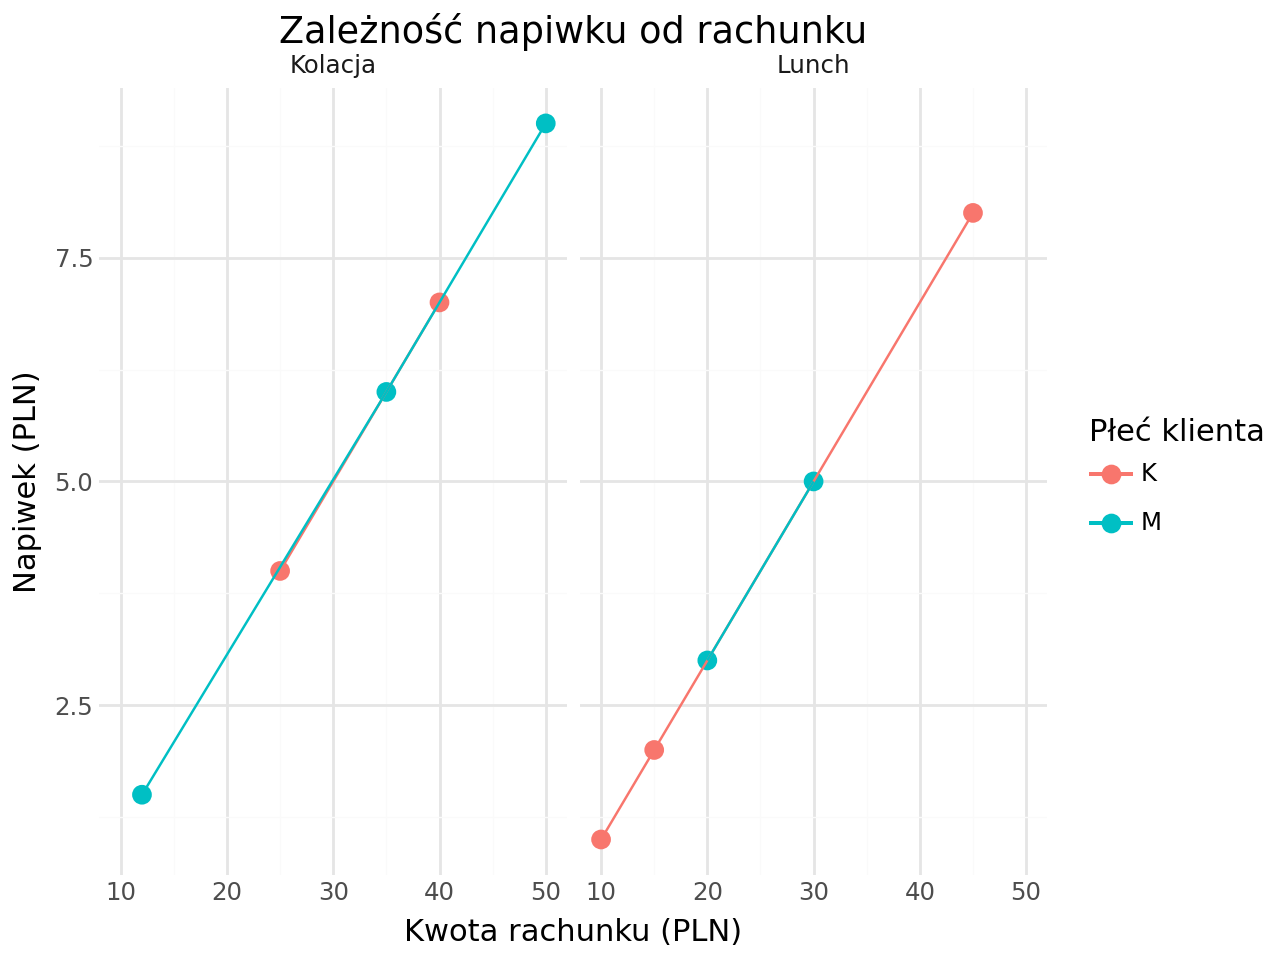

In [16]:
wykres_finalny = (
    ggplot(df, aes(x='rachunek', y='napiwek', color='plec'))
    + geom_point(size=3)
    + geom_line()
    + facet_wrap('~pora_dnia')
    + theme_minimal()
    + labs(
        title="Zależność napiwku od rachunku",
        x="Kwota rachunku (PLN)",
        y="Napiwek (PLN)",
        color="Płeć klienta"
    )
)
wykres_finalny

pojedyncza linia na wykresie, subtitle

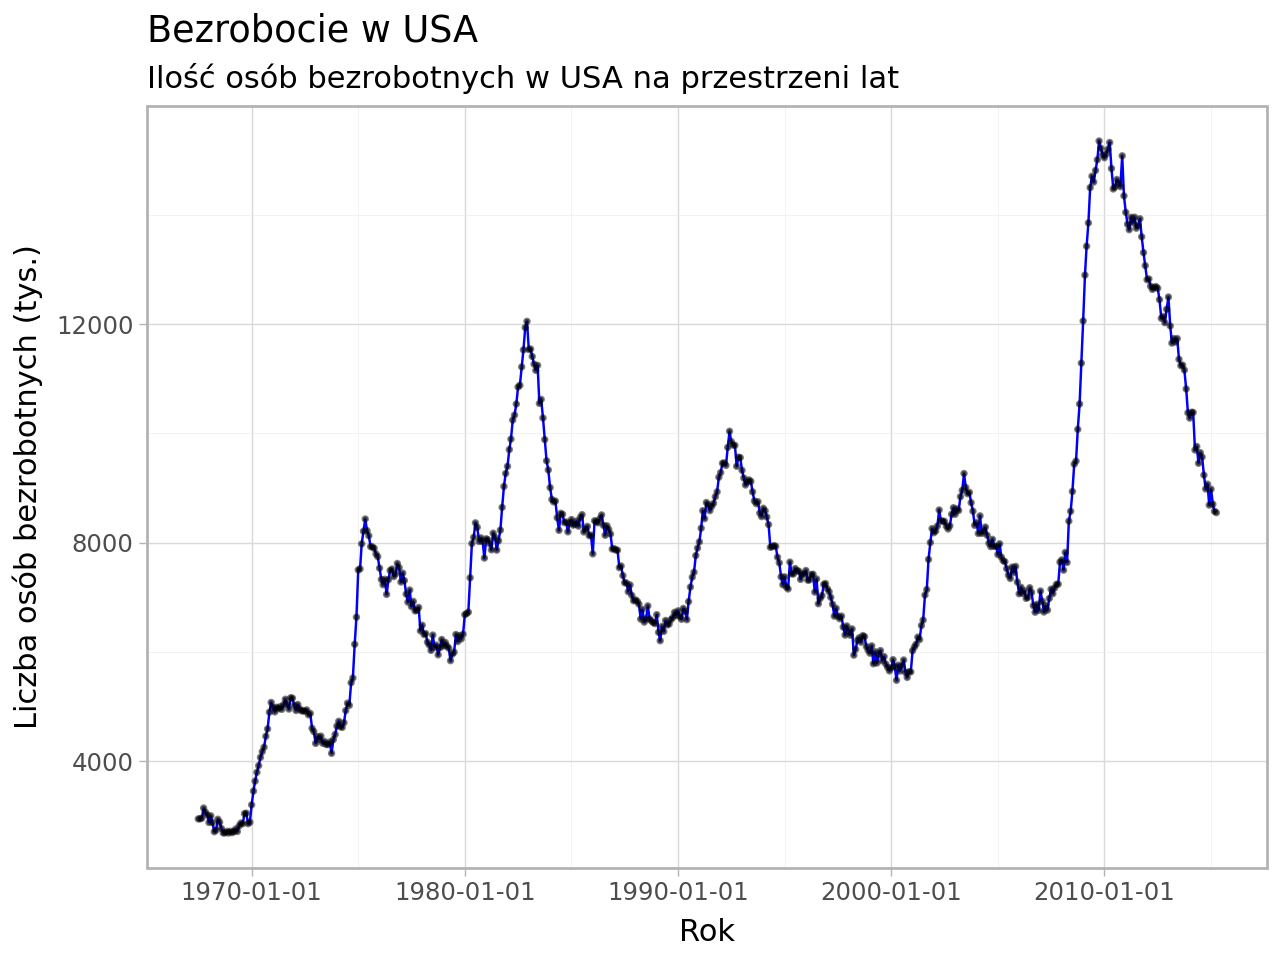

In [21]:
plot1 = (
    ggplot(economics, aes(x='date', y='unemploy'))
    + geom_line(color='blue')
    + geom_point(size=0.5, alpha=0.5)
    + labs(
        title="Bezrobocie w USA",
        subtitle="Ilość osób bezrobotnych w USA na przestrzeni lat",
        x="Rok",
        y="Liczba osób bezrobotnych (tys.)"
    )
)
plot1

dwa wykresy na jednym wykresie

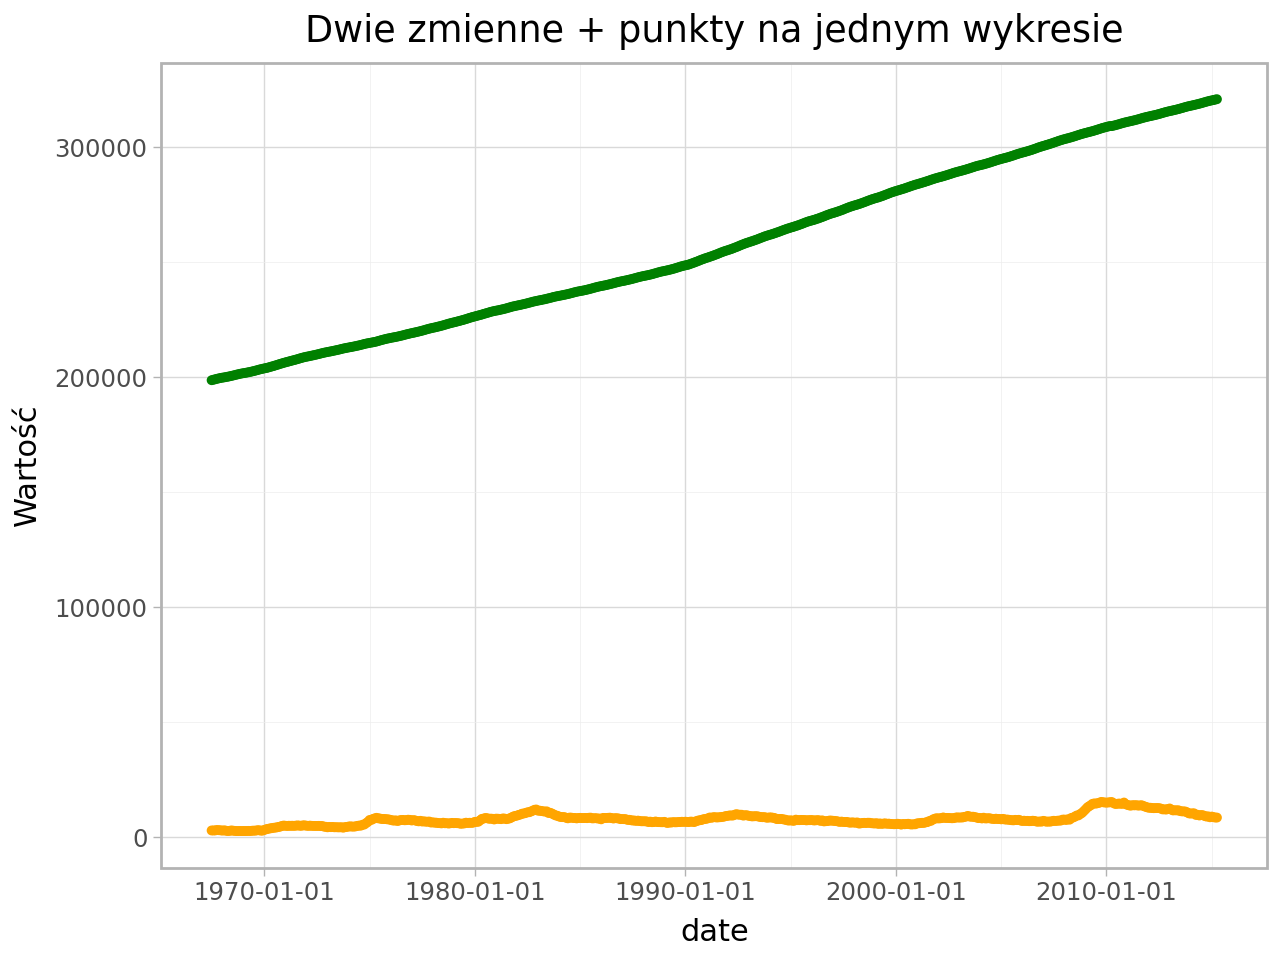

In [19]:
plot_dual = (
    ggplot(economics, aes(x='date'))
    + geom_line(aes(y='pop'), color='green')
    + geom_point(aes(y='pop'), color='green', size=1)
    + geom_line(aes(y='unemploy'), color='orange')
    + geom_point(aes(y='unemploy'), color='orange', size=1)
    + labs(
        title="Bezrobocie w USA",
        subtitle="Szereg czasowy ze zbioru 'economics'",
        x="Rok",
        y="Liczba osób (tys.)"
    )
)
plot_dual

histogram, legenda

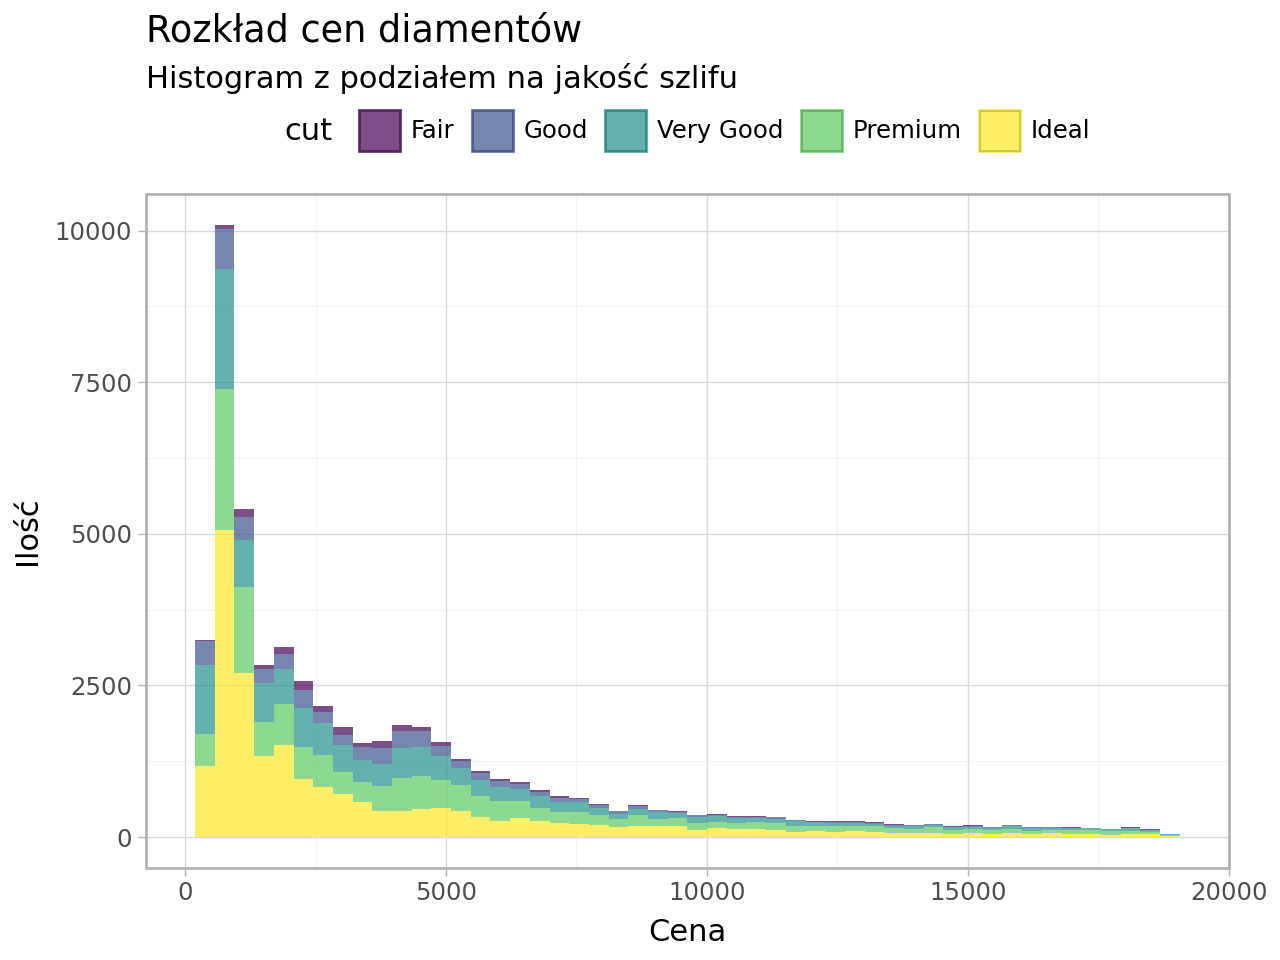

In [25]:
plot2 = (
    ggplot(diamonds, aes(x='price', fill='cut'))
    + geom_histogram(bins=50, alpha=0.7)
    + labs(
        title="Rozkład cen diamentów",
        subtitle="Histogram z podziałem na jakość szlifu",
        x="Cena",
        y="Ilość"
    )
    + theme(legend_position="top")
)
plot2

wykres gestosci (nie czaje o co chodzi ale bangla)

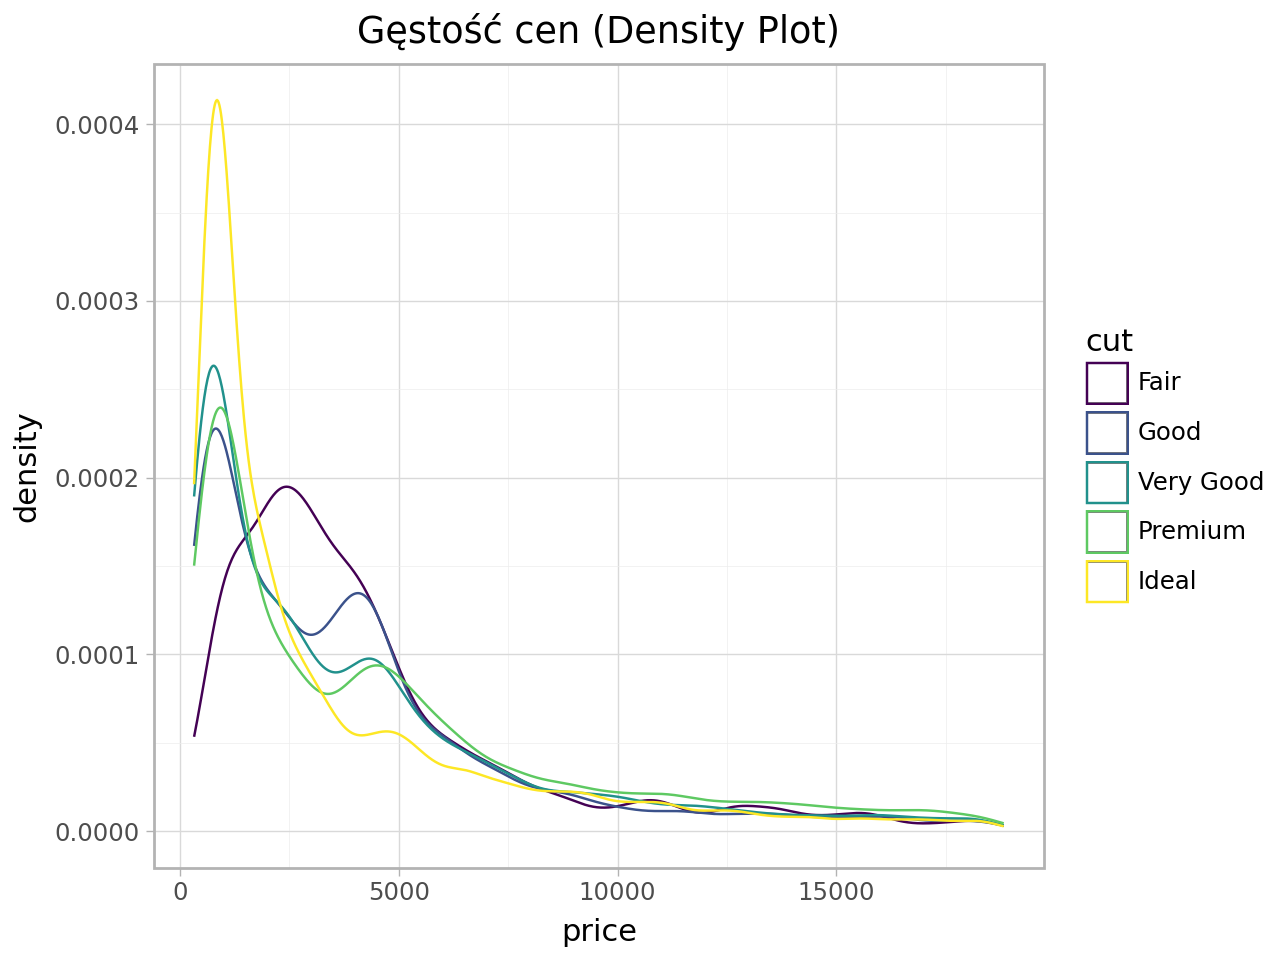

In [28]:
plot2b = (
    ggplot(diamonds, aes(x='price', color='cut'))
    + geom_density()
    + labs(title="Gęstość cen (Density Plot)")
)
plot2b

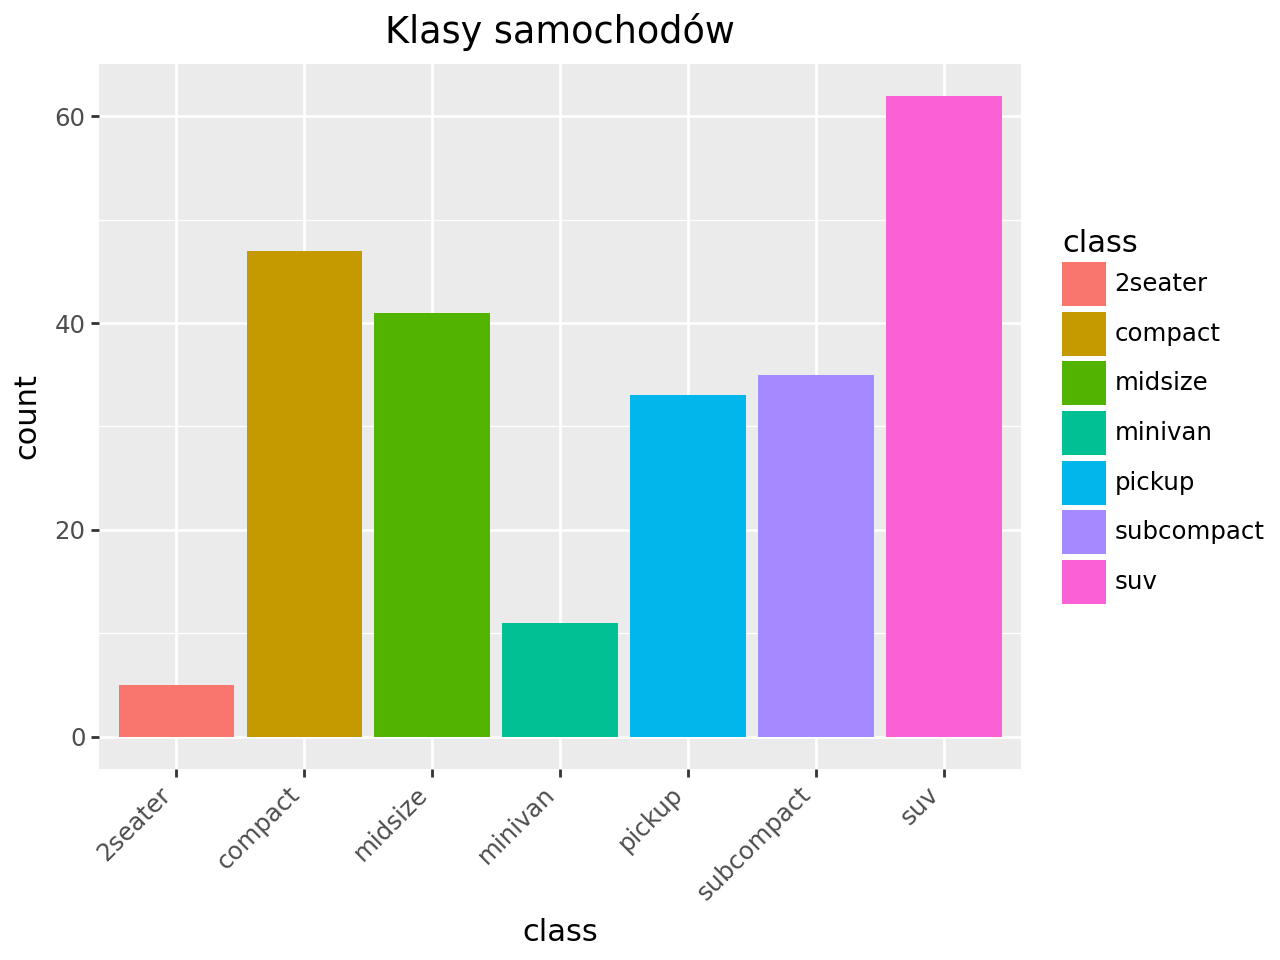

In [31]:
plot3 = (
    ggplot(mpg, aes(x='class', fill='class'))
    + geom_bar()
    + labs(title="Klasy samochodów")
    + theme_gray()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
plot3

TU MIAL BYC PIE PLOT ALE NIE DZIALA MI COORD

In [37]:
plot3_pie = (
    ggplot(mpg, aes(x=1, fill='class'))
    + geom_bar()
    + coords(theta='y')
    + theme_void()
    + labs(title="Wykres kołowy (Pie Chart)")
)
plot3_pie

TypeError: 'module' object is not callable

jakis facet subploty ( mozna dorobic jakies inne subpltoy)

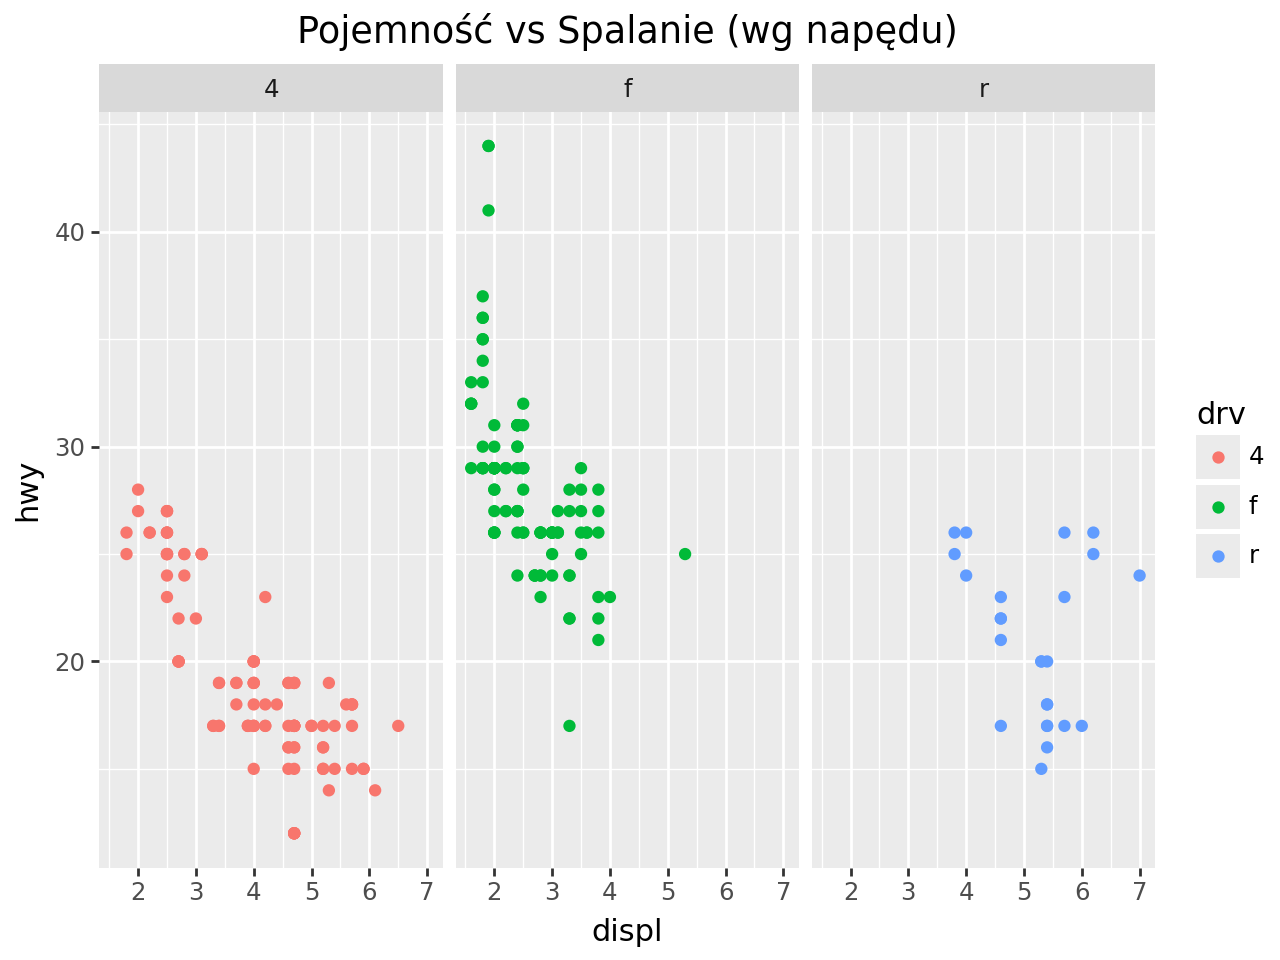

In [42]:
plot4 = (
    ggplot(mpg, aes(x='displ', y='hwy', color='drv'))
    + geom_point()
    + facet_wrap('~drv')
    + labs(title="Pojemność vs Spalanie (wg napędu)")
    + theme_gray()
)
plot4

linia regresji itp

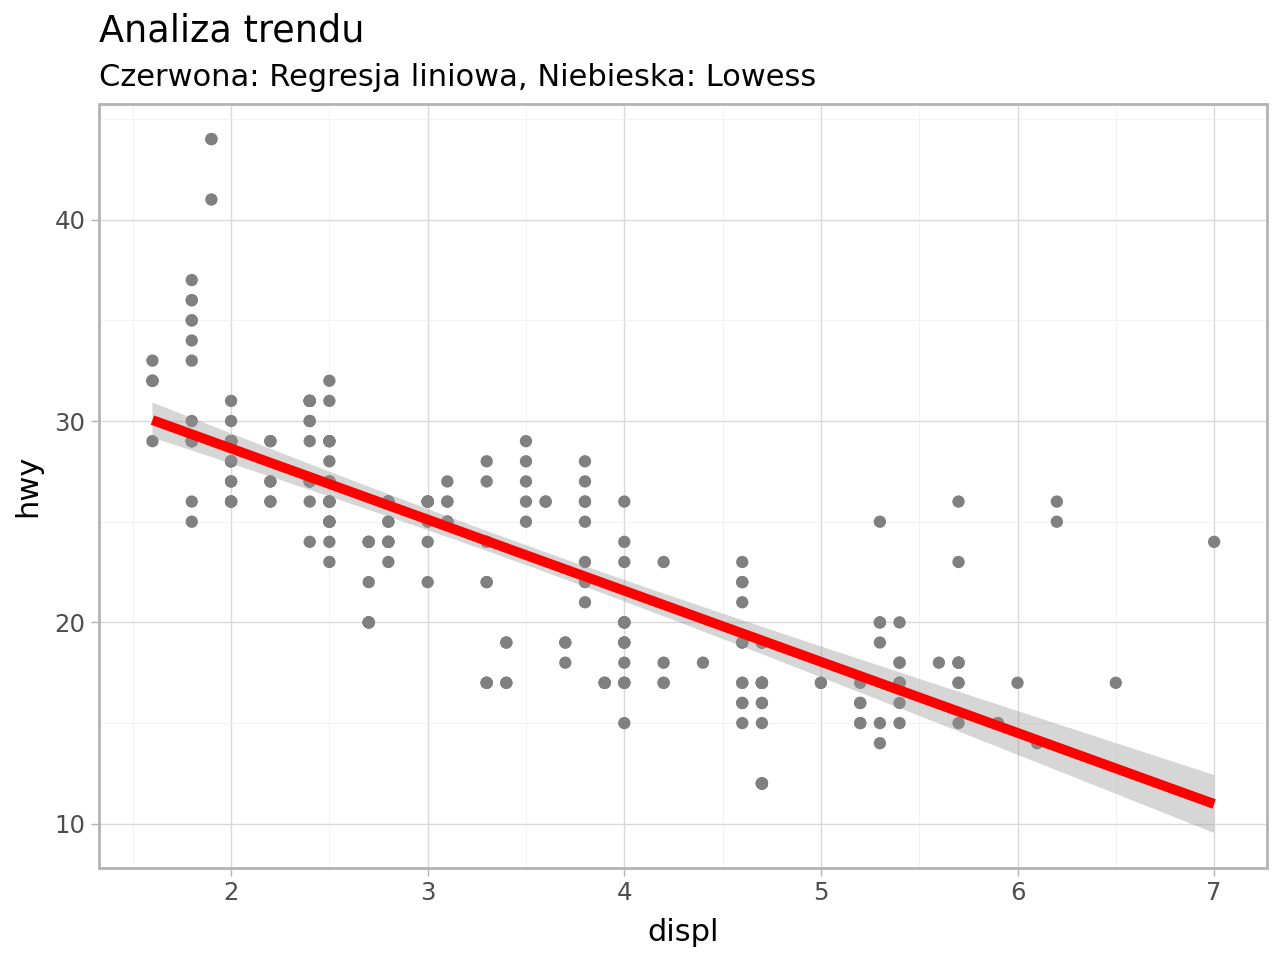

In [48]:
plot5 = (
    ggplot(mpg, aes(x='displ', y='hwy'))
    + geom_point(color='gray') # Dane w tle
    + stat_smooth(method='lm', color='red', size=2)
    + labs(
        title="Analiza trendu",
        subtitle="Czerwona: Regresja liniowa, Niebieska: Lowess"
    )
)
plot5

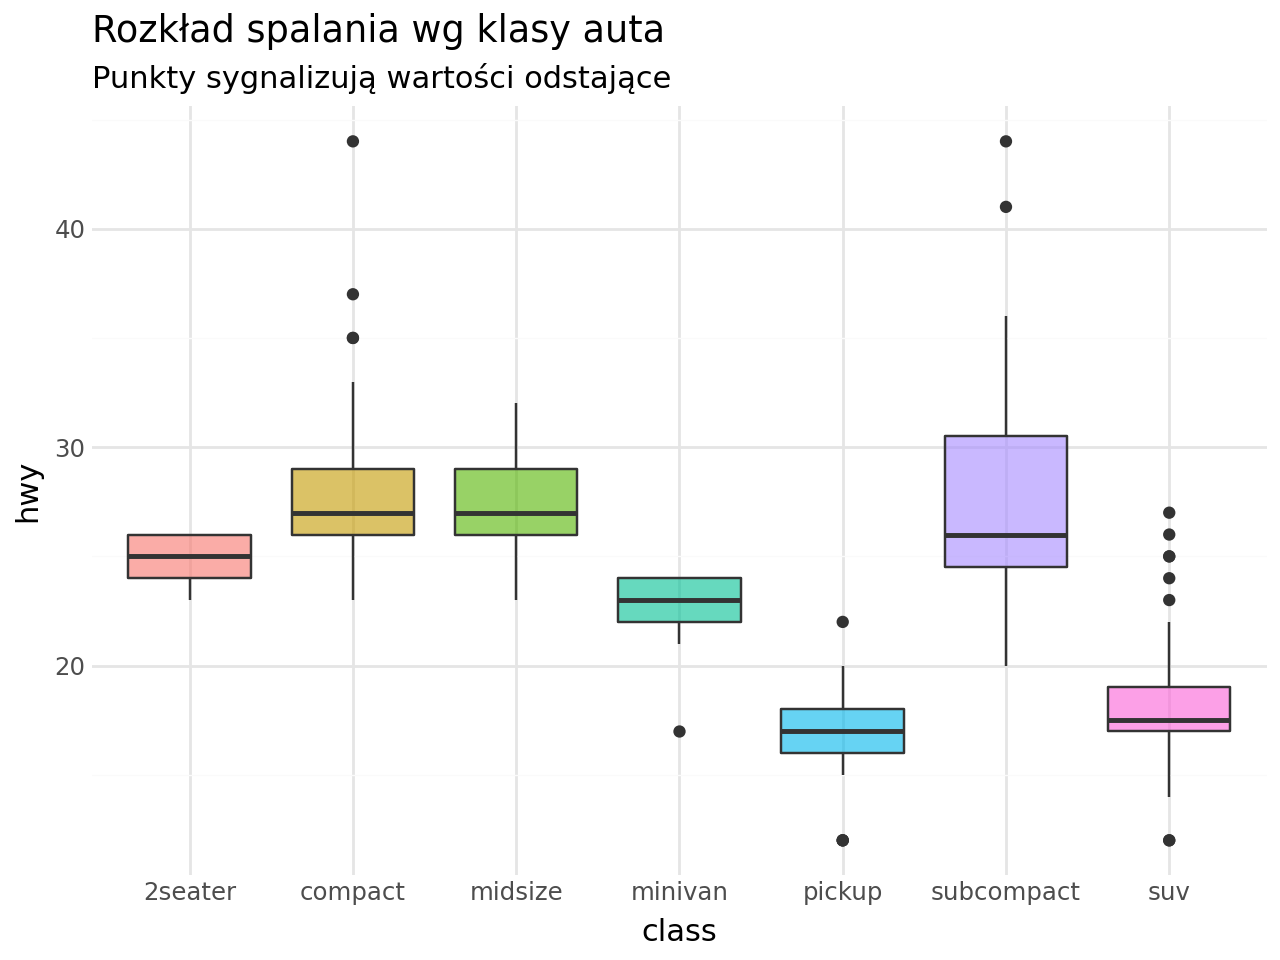

In [53]:
plotbox=(
    ggplot(mpg, aes(x='class', y='hwy', fill='class'))
    + geom_boxplot(alpha=0.6)
    + theme_minimal()
    + theme(legend_position="none")
    + labs(title="Rozkład spalania wg klasy auta", subtitle="Punkty sygnalizują wartości odstające")
)
plotbox

ciekawostka!!!!!!!!!!!!!!!!!!!

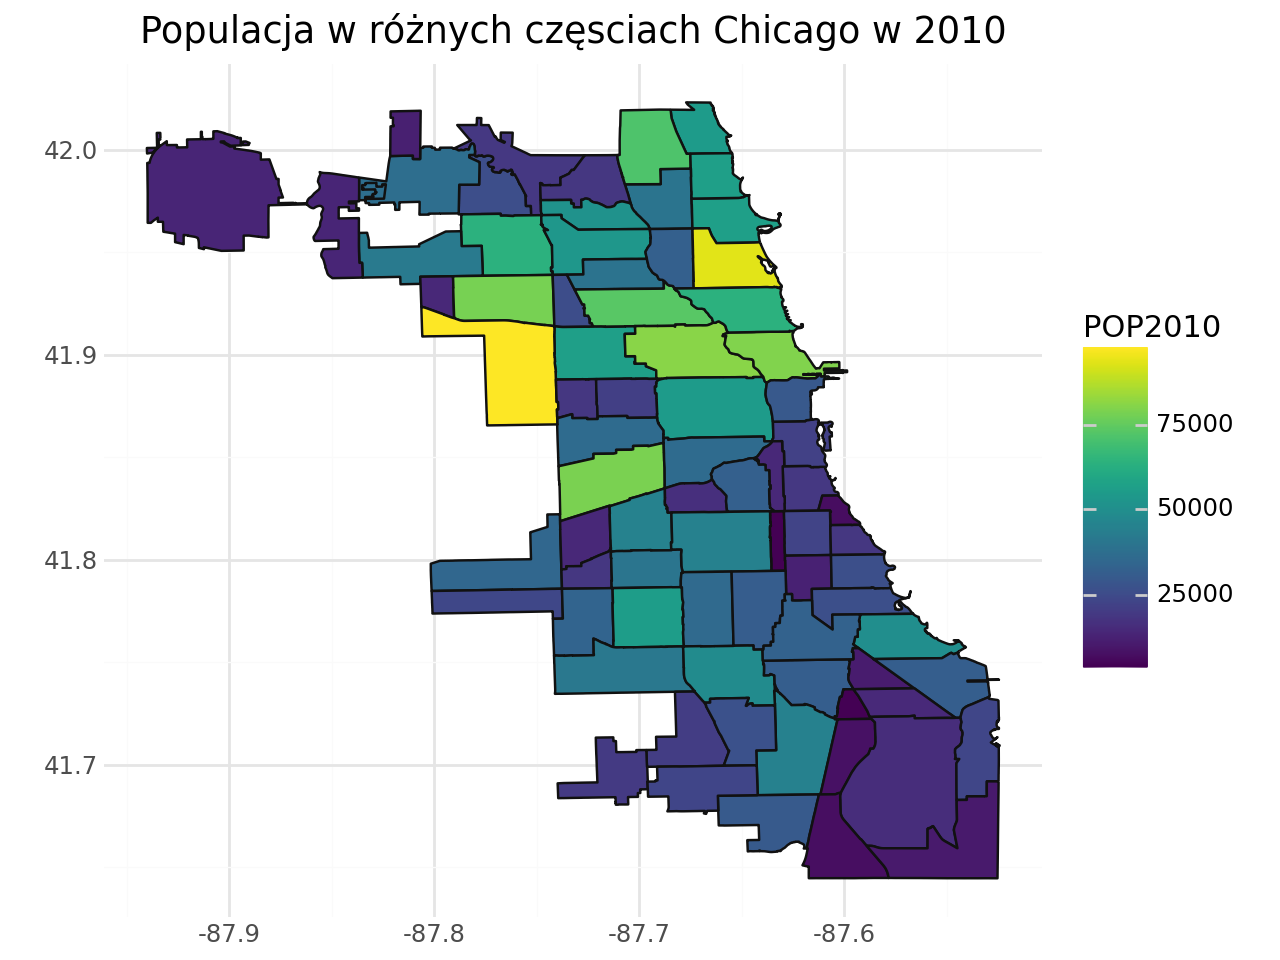

In [50]:
import geodatasets
import geopandas as gp

chicago = gp.read_file(geodatasets.get_path("geoda.chicago_commpop"))

(
    ggplot(chicago, aes(fill="POP2010"))
    + geom_map()
    + coord_fixed()
    + theme_minimal()
    + labs(title="Populacja w różnych częsciach Chicago w 2010")
)